<a href="https://colab.research.google.com/github/caiogasparine/AIDI1006-google-colab/blob/main/AIDI1006_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

# Authenticate // Authenticates your credentials and creates a client.
# subscription_key = "PASTE_YOUR_SUBSCRIPTION_KEY_HERE"
# endpoint = "PASTE_YOUR_ENDPOINT_HERE"
subscription_key = "43773aab623c4be288c3a279aa6ab764"
endpoint = "https://computer-vision-ai1006.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

'''
OCR: Read File using the Read API, extract text - remote
This example will extract text in an image, then print results, line by line.
This API call can also extract handwriting style text (not shown).
'''
print("===== Read File - remote =====")
# Get an image with text
read_image_url = "https://media.wired.com/photos/59327d3b44db296121d6b881/master/w_1600%2Cc_limit/bond_0011_Layer-5.jpg"

# Call API with URL and raw response (allows you to get the operation location)
read_response = computervision_client.read(read_image_url,  raw=True)

# Get the operation location (URL with an ID at the end) from the response
read_operation_location = read_response.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = read_operation_location.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

===== Read File - remote =====
BEN MILLER
[416.0, 42.0, 582.0, 43.0, 582.0, 68.0, 416.0, 67.0]
Dearsam.
[88.0, 167.0, 292.0, 169.0, 292.0, 215.0, 88.0, 212.0]
Welcome onboard . I'm very excited to have you
[125.0, 251.0, 891.0, 249.0, 892.0, 302.0, 125.0, 304.0]
on our team for this project. your skills will
[120.0, 313.0, 818.0, 308.0, 818.0, 360.0, 120.0, 364.0]
certainly be a valued asset and I'm looking
[122.0, 370.0, 805.0, 368.0, 805.0, 415.0, 122.0, 417.0]
forward to seeing what you come up with
[113.0, 427.0, 824.0, 427.0, 824.0, 470.0, 113.0, 472.0]
Best,
[86.0, 514.0, 235.0, 514.0, 235.0, 562.0, 86.0, 563.0]
Ben
[93.0, 570.0, 242.0, 571.0, 241.0, 613.0, 93.0, 611.0]



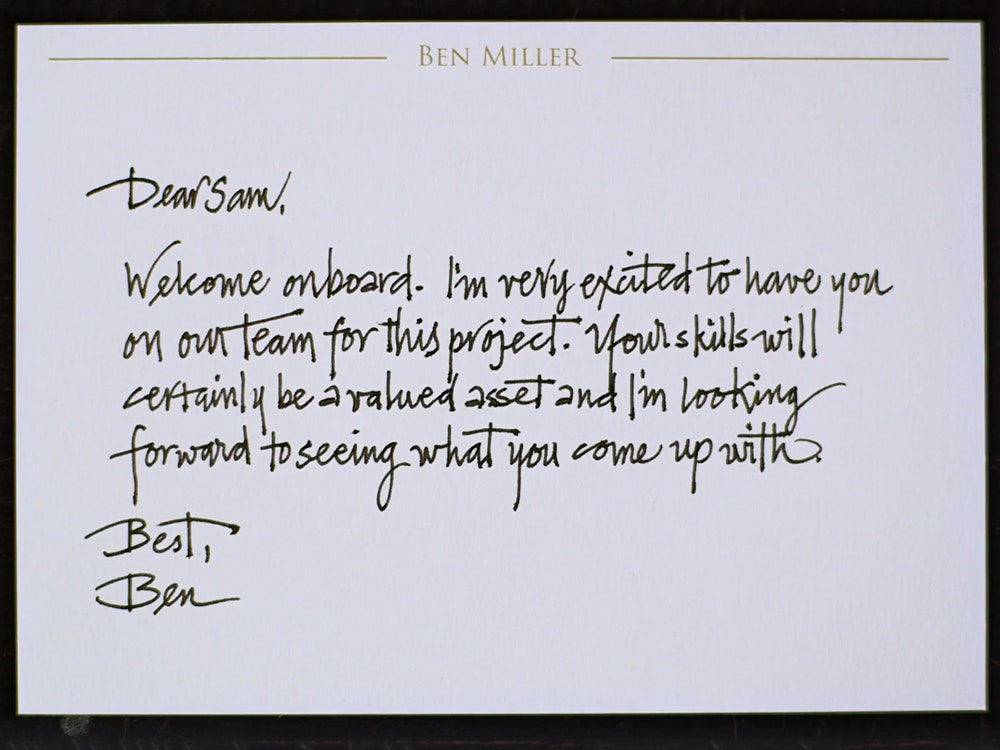

In [ ]:
# Read the image URL and print the image file (URL)

from PIL import Image
import requests
img = Image.open(requests.get(read_image_url, stream=True).raw)
img